# "Kicker Managerspiel" Squad Analysis

This notebook is an analysis of the player squads we chose for a football manager game.
Primarily it is visualized in which clubs we have invested, which players we have in common and which players are exclusive in a squad.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
# Import the squads of the participants.
# I had to typ them manually from the game interface.
kader_df = pd.read_csv('data/LigaKader.csv')

In [3]:
# Import the player database.
# It was possible to get a csv download of the database from the game.
spieler_df = pd.read_csv('data/players-se-k00012021.csv', sep=';')

In [4]:
# List of participants in our league
teilnehmer_liste = ["Ian Faust", "Karl-Heiz Rumgekicke", "Mertes Acker", "Niko_Okalov", "Rheumario", "Sebastian Olbertz"]
num_teilnehmer = len(teilnehmer_liste)

In [5]:
# Add a column in the data frame of our squads and correct two typos
kader_df["ID"] = ""
kader_df['Spieler'] = kader_df['Spieler'].replace({'Burkhardt':'Burkardt', 'Guerrero':'Guerreiro'})
kader_df

,Teilnehmer,Spieler,Startelf/Bank,ID
0,Ian Faust,Haaland,Startelf,
1,Ian Faust,Awoniyi,Startelf,
2,Ian Faust,Malen,Startelf,
3,Ian Faust,Blanco,Bank,
4,Ian Faust,Bonga,Bank,
...,...,...,...,...
127,Sebastian Olbertz,Kratzer,Bank,
128,Sebastian Olbertz,Poulsen,Bank,
129,Sebastian Olbertz,Luthe,Startelf,
130,Sebastian Olbertz,Rönnow,Bank,


## Merge the data from the handmade kader_df with the actual player database

In [6]:
# Make a matching via the family names from kader_df to player database spieler_df
new_ID_list = []
for index, row in kader_df.iterrows():
    kader_spieler = row.Spieler
    result = spieler_df[spieler_df["Nachname"] == kader_spieler]
    anzahl_treffer = result.shape[0]
    
    if anzahl_treffer == 1:
        new_ID_list.append(result.ID.values[0])

    if anzahl_treffer == 0:
        print(kader_spieler)
        new_ID_list.append('')
    if anzahl_treffer > 1:
        display(result)
        new_ID_list.append('')

kader_df["ID"] = new_ID_list

MacNutty


,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
9,pl-k00039317,Thomas,Müller,Müller,Bayern München,MIDFIELDER,7700000,0,0.0
220,pl-k00080766,Florian,Müller,Müller,VfB Stuttgart,GOALKEEPER,2600000,0,0.0


Dani Olmo
MacNutty


,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
358,pl-k00097138,Kasim,Adams,Adams,TSG Hoffenheim,DEFENDER,800000,0,0.0
374,pl-k00099347,Tyler,Adams,Adams,RB Leipzig,MIDFIELDER,2200000,0,0.0


,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
350,pl-k00096140,Nico,Schlotterbeck,Schlotterbeck,SC Freiburg,DEFENDER,1800000,0,0.0
396,pl-k00101460,Keven,Schlotterbeck,Schlotterbeck,SC Freiburg,DEFENDER,1700000,0,0.0


,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
46,pl-k00049258,Timo,Horn,Horn,1. FC Köln,GOALKEEPER,2800000,0,0.0
172,pl-k00075525,Jannes,Horn,Horn,1. FC Köln,DEFENDER,1000000,0,0.0


Dani Olmo
Stendera
Consbruch


,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
181,pl-k00076446,Yussuf,Poulsen,Poulsen,RB Leipzig,FORWARD,3600000,0,0.0
409,pl-k00101894,Andreas,Poulsen,Poulsen,Bor. Mönchengladbach,DEFENDER,500000,0,0.0


In [7]:
# Manual Corrections needed where the last name of the squad df does not match the player data base
kader_df.iat[17,3] = "pl-k00116668" # MacNutty
kader_df.iat[19,3] ="pl-k00080766" # FLORIAN Müller
kader_df.iat[51,3] = "pl-k00088049" # Dani Olmo
kader_df.iat[84,3] = "pl-k00116668" # MacNutty
kader_df.iat[100,3] = "pl-k00099347" # Tyler Adams
kader_df.iat[101,3] = "pl-k00096140" # NICO Schlotterbeck
kader_df.iat[107,3] = "pl-k00049258" # TIMO Horn
kader_df.iat[115,3] = "pl-k00088049" # Dani Olmo
kader_df.iat[128,3] = "pl-k00101894" # ANDREAS Poulsen

In [8]:
# Merge the kader_df with the player database
merged_df = kader_df.merge(spieler_df, how='left', on='ID')

In [9]:
merged_df

,Teilnehmer,Spieler,Startelf/Bank,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
0,Ian Faust,Haaland,Startelf,pl-k00108822,Erling,Haaland,Haaland,Borussia Dortmund,FORWARD,8500000.0,0.0,0.0
1,Ian Faust,Awoniyi,Startelf,pl-k00088918,Taiwo,Awoniyi,Awoniyi,1. FC Union Berlin,FORWARD,2000000.0,0.0,0.0
2,Ian Faust,Malen,Startelf,pl-k00102402,Donyell,Malen,Malen,Borussia Dortmund,FORWARD,5000000.0,0.0,0.0
3,Ian Faust,Blanco,Bank,pl-k00135221,Fabio,Blanco,Blanco,Eintracht Frankfurt,FORWARD,700000.0,0.0,0.0
4,Ian Faust,Bonga,Bank,pl-k00080756,Tarsis,Bonga,Bonga,VfL Bochum,FORWARD,700000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Sebastian Olbertz,Kratzer,Bank,pl-k00107283,Elias,Kratzer,Kratzer,SpVgg Greuther Fürth,DEFENDER,500000.0,0.0,0.0
128,Sebastian Olbertz,Poulsen,Bank,pl-k00101894,Andreas,Poulsen,Poulsen,Bor. Mönchengladbach,DEFENDER,500000.0,0.0,0.0
129,Sebastian Olbertz,Luthe,Startelf,pl-k00049871,Andreas,Luthe,Luthe,1. FC Union Berlin,GOALKEEPER,2000000.0,0.0,0.0
130,Sebastian Olbertz,Rönnow,Bank,pl-k00075651,Frederik,Rönnow,Rönnow,1. FC Union Berlin,GOALKEEPER,1400000.0,0.0,0.0


In [10]:
# Manual Addition of the two players, that are already sold in real life and therefore no longer in the player data base
merged_df.iat[120,3] = "pl_k00000001" # Demo für Stendera
merged_df.iat[120,4] = "Nils" 
merged_df.iat[120,5] = "Stendera"
merged_df.iat[120,6] = "Stendera"
merged_df.iat[120,7] = "Eintracht Frankfurt"
merged_df.iat[120,8] = "MIDFIELDER"
merged_df.iat[120,9] = 500000
merged_df.iat[120,10] = 0.0
merged_df.iat[120,11] = 0.0

merged_df.iat[121,3] = "pl_k00000002" # Demo für Stendera
merged_df.iat[121,4] = "Jomaine" 
merged_df.iat[121,5] = "Consbruch"
merged_df.iat[121,6] = "Consbruch"
merged_df.iat[121,7] = "Arminia Bielefeld"
merged_df.iat[121,8] = "MIDFIELDER"
merged_df.iat[121,9] = 500000
merged_df.iat[121,10] = 0.0
merged_df.iat[121,11] = 0.0

In [11]:
df = merged_df
df

,Teilnehmer,Spieler,Startelf/Bank,ID,Vorname,Nachname,Angezeigter Name,Verein,Position,Marktwert,Punkte,Notendurchschnitt
0,Ian Faust,Haaland,Startelf,pl-k00108822,Erling,Haaland,Haaland,Borussia Dortmund,FORWARD,8500000.0,0.0,0.0
1,Ian Faust,Awoniyi,Startelf,pl-k00088918,Taiwo,Awoniyi,Awoniyi,1. FC Union Berlin,FORWARD,2000000.0,0.0,0.0
2,Ian Faust,Malen,Startelf,pl-k00102402,Donyell,Malen,Malen,Borussia Dortmund,FORWARD,5000000.0,0.0,0.0
3,Ian Faust,Blanco,Bank,pl-k00135221,Fabio,Blanco,Blanco,Eintracht Frankfurt,FORWARD,700000.0,0.0,0.0
4,Ian Faust,Bonga,Bank,pl-k00080756,Tarsis,Bonga,Bonga,VfL Bochum,FORWARD,700000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Sebastian Olbertz,Kratzer,Bank,pl-k00107283,Elias,Kratzer,Kratzer,SpVgg Greuther Fürth,DEFENDER,500000.0,0.0,0.0
128,Sebastian Olbertz,Poulsen,Bank,pl-k00101894,Andreas,Poulsen,Poulsen,Bor. Mönchengladbach,DEFENDER,500000.0,0.0,0.0
129,Sebastian Olbertz,Luthe,Startelf,pl-k00049871,Andreas,Luthe,Luthe,1. FC Union Berlin,GOALKEEPER,2000000.0,0.0,0.0
130,Sebastian Olbertz,Rönnow,Bank,pl-k00075651,Frederik,Rönnow,Rönnow,1. FC Union Berlin,GOALKEEPER,1400000.0,0.0,0.0


## End of merging and cleaning, start of fun :)

### How much of the 42.5 million budget did the participants spend?

In [12]:
for teilnehmer in teilnehmer_liste:
    print(teilnehmer, sum(df[df["Teilnehmer"] == teilnehmer]["Marktwert"].values))

Ian Faust 42500000.0
Karl-Heiz Rumgekicke 42500000.0
Mertes Acker 42500000.0
Niko_Okalov 42500000.0
Rheumario 42400000.0
Sebastian Olbertz 42500000.0


### How much money did we invest in which club for the starting 11 of our squad?

In [13]:
# The user Rheumario is just a bot.
# To see wehre the humans invested their money for the starting 11, he got filtered out.
mensch_df = df[df["Teilnehmer"] != "Rheumario"]
start_11_mensch = mensch_df[mensch_df["Startelf/Bank"] == "Startelf"]
start_11_mit_rheumario = df[df["Startelf/Bank"] == "Startelf"]

In [14]:
filter_df = start_11_mensch

# A list of the 18 Bundesliga Clubs
vereinsliste = pd.unique(spieler_df["Verein"].values)
verein_df = pd.DataFrame(columns = ["Verein", "Marktwert", "Anzahl Spieler"])

# Go through our starting 11s and match the players to the Bundesliga clubs
for verein in vereinsliste:
    marktwert_verein = sum(filter_df[filter_df["Verein"] == verein]["Marktwert"])
    anzahl_verein = filter_df[filter_df["Verein"] == verein].shape[0]
    
    new_verein = {'Verein':verein, 'Marktwert':marktwert_verein, 'Anzahl Spieler':anzahl_verein}
    verein_df = verein_df.append(new_verein, ignore_index=True)

verein_df = verein_df.sort_values("Marktwert", ascending=False)
verein_df

,Verein,Marktwert,Anzahl Spieler
7,Borussia Dortmund,43500000.0,8
1,RB Leipzig,35700000.0,8
12,Bayer 04 Leverkusen,13000000.0,4
10,1. FC Union Berlin,12000000.0,5
3,Hertha BSC,11800000.0,6
2,TSG Hoffenheim,9700000.0,4
9,Eintracht Frankfurt,9500000.0,3
0,Bayern München,8800000.0,2
16,FC Augsburg,8200000.0,4
6,1. FSV Mainz 05,5800000.0,3


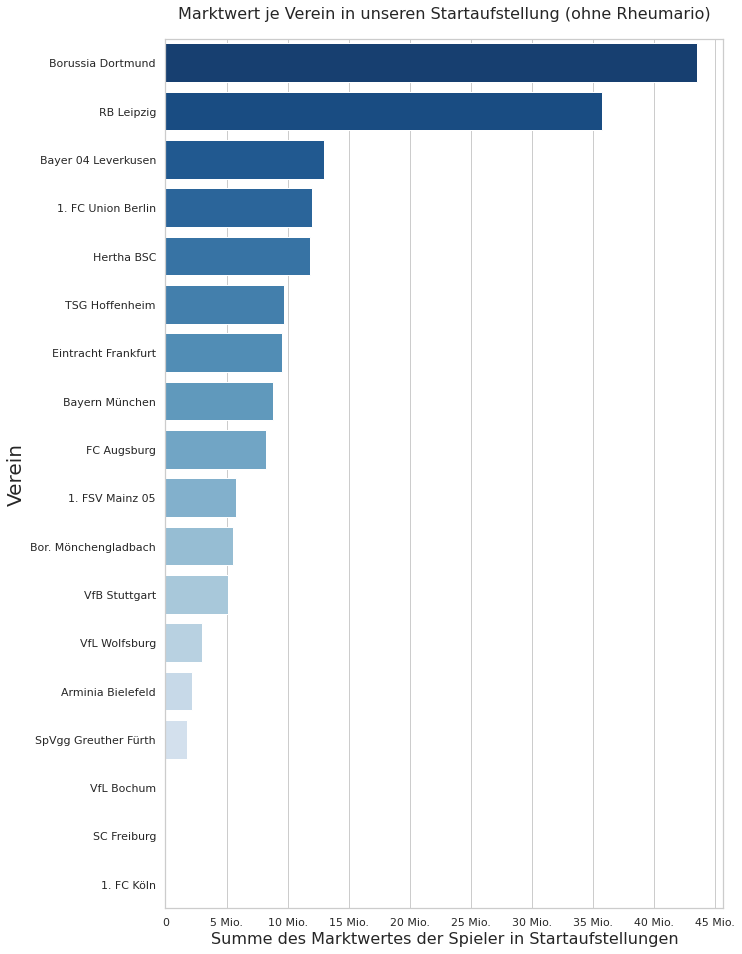

In [15]:
# Visualize in a barh plot
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize = (10,16))
ax = sns.barplot(y="Verein", x="Marktwert", data=verein_df, palette="Blues_r")

plt.xlabel('Summe des Marktwertes der Spieler in Startaufstellungen', size=16)
plt.ylabel('Verein', size=20)
plt.title('Marktwert je Verein in unseren Startaufstellung (ohne Rheumario)', size=16, pad=20)

# XTicks in a more 'football' style, less scientific
ax.set_xticks(range(0,50000000,5000000)) 
ax.set_xticklabels(['0','5 Mio.','10 Mio.','15 Mio.','20 Mio.','25 Mio.','30 Mio.','35 Mio.','40 Mio.','45 Mio.'])

plt.show()

## Analysis of who invested how much in which club

In [16]:
# Setup a matrix of club to participants with each entry being the investment 
vereinsliste = pd.unique(spieler_df["Verein"].values)
matrix_df = pd.DataFrame(columns = ["Verein", 'Ian Faust', 'Karl-Heiz Rumgekicke', 'Mertes Acker', 'Niko_Okalov', 'Rheumario', 'Sebastian Olbertz'])

for verein in vereinsliste:
    teilnehmer_verein_marktwert = []
    for teilnehmer in teilnehmer_liste: 
        marktwert_verein = sum(df[(df["Verein"] == verein) & (df["Teilnehmer"] == teilnehmer)]["Marktwert"])
        teilnehmer_verein_marktwert.append(marktwert_verein)
  
    new_verein = {'Verein':verein,
                  'Ian Faust':teilnehmer_verein_marktwert[0],
                  'Karl-Heiz Rumgekicke':teilnehmer_verein_marktwert[1],
                  'Mertes Acker':teilnehmer_verein_marktwert[2], 
                  'Niko_Okalov':teilnehmer_verein_marktwert[3], 
                  'Rheumario':teilnehmer_verein_marktwert[4],
                  'Sebastian Olbertz':teilnehmer_verein_marktwert[5]
                 }
    matrix_df = matrix_df.append(new_verein, ignore_index=True)

# Adding a sum-column to sort the clubs according to total investment
matrix_df["Summe"] = matrix_df["Ian Faust"] + matrix_df["Karl-Heiz Rumgekicke"] + matrix_df["Mertes Acker"] + matrix_df["Niko_Okalov"] + matrix_df["Rheumario"] + matrix_df["Sebastian Olbertz"]
matrix_df = matrix_df.sort_values("Summe", ascending=False)
matrix_df = matrix_df.set_index("Verein")
del matrix_df["Summe"]

matrix_df

,Ian Faust,Karl-Heiz Rumgekicke,Mertes Acker,Niko_Okalov,Rheumario,Sebastian Olbertz
Verein,,,,,,
Borussia Dortmund,14000000.0,2800000.0,14700000.0,600000.0,0,15100000.0
RB Leipzig,2800000.0,7900000.0,5500000.0,16700000.0,6200000.0,4500000.0
Eintracht Frankfurt,8200000.0,2500000.0,0,700000.0,6200000.0,500000.0
TSG Hoffenheim,2000000.0,0.0,2000000.0,4400000.0,6300000.0,3300000.0
Hertha BSC,1700000.0,2000000.0,1500000.0,7700000.0,2000000.0,2500000.0
Bayer 04 Leverkusen,800000.0,0.0,0,9200000.0,1800000.0,3800000.0
1. FC Union Berlin,4500000.0,3500000.0,600000.0,0,0,5900000.0
FC Augsburg,2000000.0,2500000.0,2000000.0,0,4000000.0,2200000.0
1. FSV Mainz 05,500000.0,5300000.0,2300000.0,500000.0,2000000.0,1000000.0


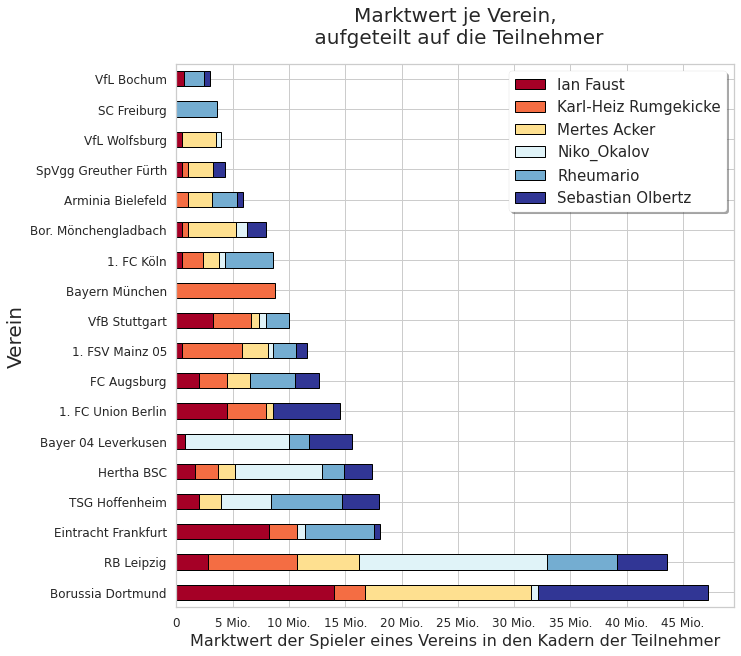

In [17]:
# Visualize this investment of each participants in the clubs
ax = matrix_df.plot(kind="barh",
                    stacked=True, 
                    colormap='RdYlBu',
                    figsize=(10, 10), 
                    fontsize=12, 
                    linewidth=1,
                    edgecolor="black")
matplotlib.style.use('seaborn-paper') 

plt.xlabel('Marktwert der Spieler eines Vereins in den Kadern der Teilnehmer', size=16)
plt.ylabel('Verein', size=20)
plt.title('Marktwert je Verein,\n aufgeteilt auf die Teilnehmer', size=20, pad=20)
ax.legend(ncol = 1, loc='upper right', frameon=True, fontsize=15, facecolor="white", shadow=True)

# XTicks in a more 'football' style, less scientific
ax.set_xticks(range(0,50000000,5000000)) 
ax.set_xticklabels(['0','5 Mio.','10 Mio.','15 Mio.','20 Mio.','25 Mio.','30 Mio.','35 Mio.','40 Mio.','45 Mio.'])

plt.show()

## Analyis of who invested in how many players of which club
Same analysis as the investment, now only with the count of players.

In [18]:
vereinsliste = pd.unique(spieler_df["Verein"].values)
matrix_df = pd.DataFrame(columns = ["Verein", 'Ian Faust', 'Karl-Heiz Rumgekicke', 'Mertes Acker', 'Niko_Okalov', 'Rheumario', 'Sebastian Olbertz'])

for verein in vereinsliste:
    teilnehmer_verein_marktwert = []
    for teilnehmer in teilnehmer_liste: 
        marktwert_verein = df[(df["Verein"] == verein) & (df["Teilnehmer"] == teilnehmer)].shape[0]
        teilnehmer_verein_marktwert.append(marktwert_verein)
  
    new_verein = {'Verein':verein,
                  'Ian Faust':teilnehmer_verein_marktwert[0],
                  'Karl-Heiz Rumgekicke':teilnehmer_verein_marktwert[1],
                  'Mertes Acker':teilnehmer_verein_marktwert[2], 
                  'Niko_Okalov':teilnehmer_verein_marktwert[3], 
                  'Rheumario':teilnehmer_verein_marktwert[4],
                  'Sebastian Olbertz':teilnehmer_verein_marktwert[5]
                 }
    matrix_df = matrix_df.append(new_verein, ignore_index=True)

matrix_df["Summe"] = matrix_df["Ian Faust"] + matrix_df["Karl-Heiz Rumgekicke"] + matrix_df["Mertes Acker"] + matrix_df["Niko_Okalov"] + matrix_df["Rheumario"] + matrix_df["Sebastian Olbertz"]
matrix_df = matrix_df.sort_values("Summe", ascending=False)
matrix_df = matrix_df.set_index("Verein")
del matrix_df["Summe"]
matrix_df

,Ian Faust,Karl-Heiz Rumgekicke,Mertes Acker,Niko_Okalov,Rheumario,Sebastian Olbertz
Verein,,,,,,
RB Leipzig,1,2,3,4,3,1
Borussia Dortmund,3,1,5,1,0,3
Hertha BSC,1,2,1,5,1,2
1. FSV Mainz 05,1,4,2,1,1,2
Eintracht Frankfurt,4,1,0,1,3,1
TSG Hoffenheim,1,0,1,2,3,1
Bor. Mönchengladbach,1,1,2,2,0,2
1. FC Union Berlin,2,1,1,0,0,4
1. FC Köln,1,2,1,1,3,0


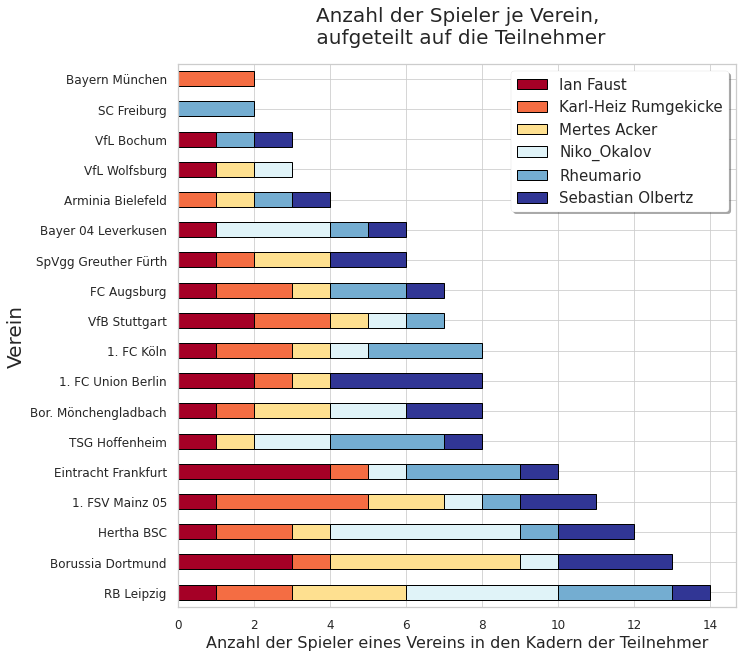

In [19]:
ax = matrix_df.plot(kind="barh", 
                    stacked=True, 
                    colormap='RdYlBu', 
                    figsize=(10, 10), 
                    fontsize=12, 
                    linewidth=1, 
                    edgecolor="black")
matplotlib.style.use('seaborn-paper')

plt.xlabel('Anzahl der Spieler eines Vereins in den Kadern der Teilnehmer', size=16)
plt.ylabel('Verein', size=20)
plt.title('Anzahl der Spieler je Verein,\n aufgeteilt auf die Teilnehmer', size=20, pad=20)

ax.legend(ncol=1, 
          loc='upper right', 
          frameon=True, 
          fontsize=15, 
          facecolor="white", 
          shadow=True)

plt.show()

## Which players overlap between the squads?

In [20]:
# Check for overlaps, e.g. players that appear in the squads of more than one participant 
name, anzahl = np.unique(df['Angezeigter Name'],return_counts=True)
anzahl_df = pd.DataFrame(data=[name, anzahl]).T
anzahl_df.columns = ["Name", "Anzahl"]
anzahl_df[anzahl_df["Anzahl"] > 1].sort_values(by="Anzahl", ascending=False)

,Name,Anzahl
3,Asta,4
26,Dorsch,4
78,Scally,4
33,Haaland,3
13,Burkardt,2
20,Dahoud,2
21,Dani Olmo,2
11,Borré,2
29,Garcia MacNulty,2
4,Awoniyi,2


## Heatmap of the value of the overlapping players between the participants squads

In [21]:
# Get the market value and the names of the players that are identical in the squads of two participants
def get_same_players_mv_names(teilnehmer1, teilnehmer2):
    mv = 0
    temp_df = pd.DataFrame(columns=["Playername", "MarketValue"])


    teil1_df = df[df["Teilnehmer"] == teilnehmer1]
    teil2_df = df[df["Teilnehmer"] == teilnehmer2]

    teil1_id_set = set(teil1_df.ID.values)
    teil2_id_set = set(teil2_df.ID.values)

    # Check for intersection as a set operation
    intersection_id_list = list(teil1_id_set.intersection(teil2_id_set))

    if len(intersection_id_list) == 0:
        return mv, []
    else:
        for intersection_id in intersection_id_list:
            mv += spieler_df[spieler_df["ID"] == intersection_id]["Marktwert"].values[0] 
            
            # Add players to a df instead of list to sort the players in list according to their marketvalue
            new_player = {'Playername':spieler_df[spieler_df["ID"] == intersection_id]["Angezeigter Name"].values[0],
                          'MarketValue':spieler_df[spieler_df["ID"] == intersection_id]["Marktwert"].values[0]
             }
            temp_df = temp_df.append(new_player, ignore_index=True)
            
    temp_df = temp_df.sort_values("MarketValue",ascending=False)
    playernames = temp_df["Playername"].values
    
    return mv, playernames

get_same_players_mv_names("Ian Faust", "Mertes Acker")

(13500000,
 array(['Haaland', 'Raum', 'Dorsch', 'Asta', 'Scally'], dtype=object))

In [22]:
# heatmap data as a number array
# names_arr saves a list of names for each pair of participants
heatmap_data = np.zeros((num_teilnehmer, num_teilnehmer))
names_arr = [['' for i in range(num_teilnehmer)] for j in range(num_teilnehmer)]

for i in range(len(teilnehmer_liste)):
    for j in range(len(teilnehmer_liste)):
        # Skip the check for overlap of one player to himself
        if i == j:
            heatmap_data[i][j] = 0
        else:
            teilnehmer1 = teilnehmer_liste[i]
            teilnehmer2 = teilnehmer_liste[j]

            mv, names_list = get_same_players_mv_names(teilnehmer1, teilnehmer2)
            heatmap_data[i][j] = mv
            
            # Join the string list to one string
            names = ',\n'.join(names_list)
            names_arr[i][j] = names

# Divide all by 1 million for more readable numbers
results = heatmap_data/1000000
names_arr = np.asarray(names_arr)
results

array([[ 0. ,  3.5, 13.5,  2.2,  2. , 11. ],
       [ 3.5,  0. ,  7.7,  5. ,  4.5,  3.3],
       [13.5,  7.7,  0. ,  0.5,  4.2, 14. ],
       [ 2.2,  5. ,  0.5,  0. ,  0. ,  0. ],
       [ 2. ,  4.5,  4.2,  0. ,  0. ,  0. ],
       [11. ,  3.3, 14. ,  0. ,  0. ,  0. ]])

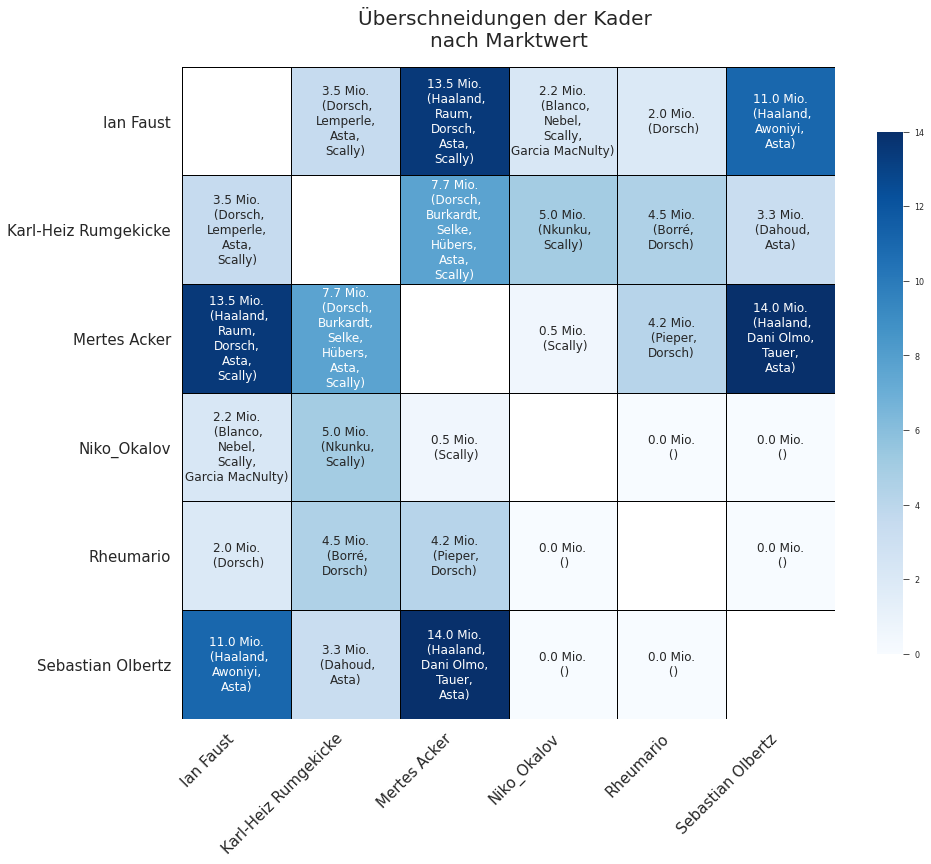

In [31]:
# Prepare the labels as a combination of the overlap sum and the list of player names
labels = (np.asarray(["{1:.1f} Mio.\n ({0})".format(string, value)
                      for string, value in zip(names_arr.flatten(), results.flatten())])
         ).reshape(num_teilnehmer, num_teilnehmer)

# Different mask to hide the entire upper triangular
triu_mask = np.zeros_like(heatmap_data)
triu_mask[np.triu_indices_from(triu_mask)] = True

# Mask to hide the main diagonal (e.g comparison of participant to himself)
diag_mask = np.zeros_like(heatmap_data)
diag_mask[np.diag_indices_from(diag_mask)] = True

# Create the plot
f, ax = plt.subplots(figsize=(15, 12))
matplotlib.style.use('seaborn-paper')

ax = sns.heatmap(results,
                 mask=diag_mask, # Change to triu_mask for a "staircase" diagram
                 cmap="Blues",
                 cbar=True,
                 cbar_kws={'shrink': 0.8},
                 square=True,
                 annot=labels,
                 fmt="",
                 annot_kws={'fontsize':'medium'},
                 xticklabels=teilnehmer_liste,
                 yticklabels=teilnehmer_liste,
                 linewidths=1,
                 linecolor="black"
                )
ax.set_yticklabels(teilnehmer_liste, size = 15, rotation=0)
ax.set_xticklabels(teilnehmer_liste, size = 15, rotation=45, horizontalalignment='right')
plt.title("Überschneidungen der Kader \nnach Marktwert", size=20, pad=20)

plt.show()

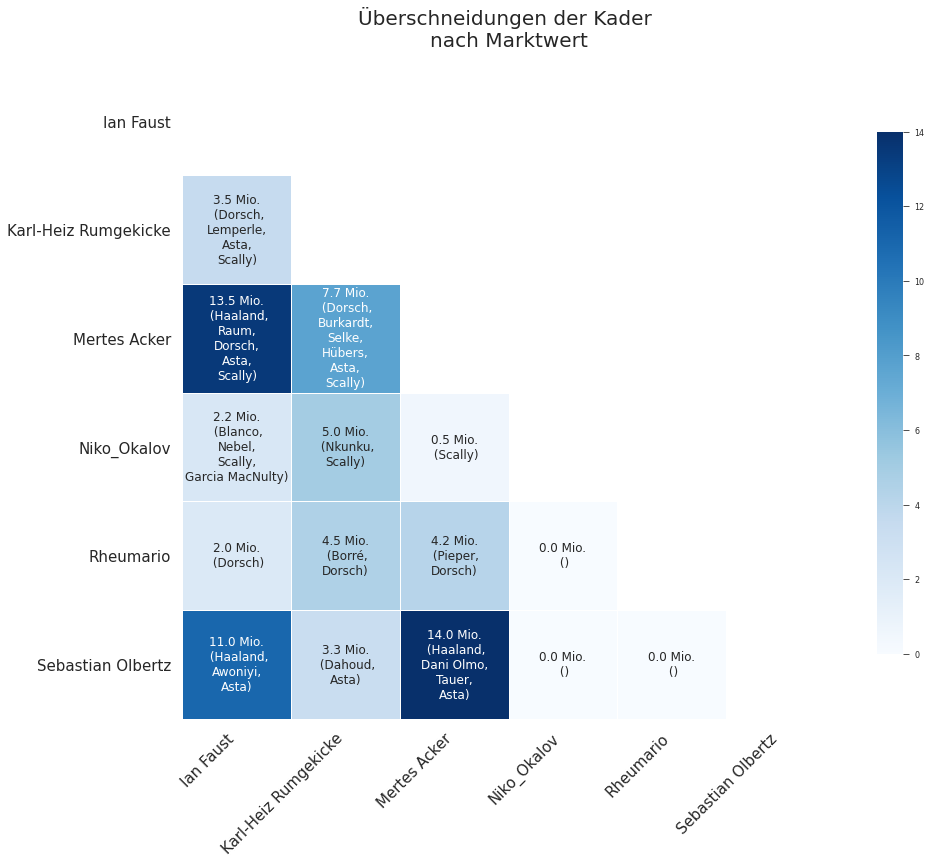

In [30]:
# Same graph, now with the triangualar shape
# Prepare the labels as a combination of the overlap sum and the list of player names
labels = (np.asarray(["{1:.1f} Mio.\n ({0})".format(string, value)
                      for string, value in zip(names_arr.flatten(), results.flatten())])
         ).reshape(num_teilnehmer, num_teilnehmer)

# Different mask to hide the entire upper triangular
triu_mask = np.zeros_like(heatmap_data)
triu_mask[np.triu_indices_from(triu_mask)] = True

# Mask to hide the main diagonal (e.g comparison of participant to himself)
diag_mask = np.zeros_like(heatmap_data)
diag_mask[np.diag_indices_from(diag_mask)] = True

# Create the plot
f, ax = plt.subplots(figsize=(15, 12))
matplotlib.style.use('seaborn-paper')

ax = sns.heatmap(results,
                 mask=triu_mask, # Change to triu_mask for a "staircase" diagram
                 cmap="Blues",
                 cbar=True,
                 cbar_kws={'shrink': 0.8},
                 square=True,
                 annot=labels,
                 fmt="",
                 annot_kws={'fontsize':'medium'},
                 xticklabels=teilnehmer_liste,
                 yticklabels=teilnehmer_liste,
                 linewidths=1,
                 linecolor="white" # Preferably white with the triu mask
                )
ax.set_yticklabels(teilnehmer_liste, size = 15, rotation=0)
ax.set_xticklabels(teilnehmer_liste, size = 15, rotation=45, horizontalalignment='right')
plt.title("Überschneidungen der Kader \nnach Marktwert", size=20, pad=20)

plt.show()

## Analysis about the players a participant has exclusively in his squad

In [27]:
# Get the marketvalues and the names of the players, that are only in the squad of 1 participant
def get_exclusive_mv(teilnehmer1):
    mv = 0
    exclusive_id_list = []
    
    # Additional data frame needed for sorted list
    exclusive_df = pd.DataFrame(columns=["Playername", "MarketValue"])
    
    # Set comparison of 1 participant versus the entire rest of participants
    teil1_df = df[df["Teilnehmer"] == teilnehmer1]
    rest_df = df[df["Teilnehmer"] != teilnehmer1]

    teil1_id_set = set(teil1_df.ID.values)
    rest_id_set = set(rest_df.ID.values)
    
    # Set operations for intersection and set difference
    intersection_id_list = list(teil1_id_set.intersection(rest_id_set))
    exclusive_id_list = list(teil1_id_set - rest_id_set)

    if len(exclusive_id_list) == 0:
        return mv, []
    else:
        for exclusive_id in exclusive_id_list:
            mv += df[df["ID"] == exclusive_id]["Marktwert"].values[0] 
            
            new_player = {'Playername':df[df["ID"] == exclusive_id]["Angezeigter Name"].values[0],
                          'MarketValue':df[df["ID"] == exclusive_id]["Marktwert"].values[0]
             }
            exclusive_df = exclusive_df.append(new_player, ignore_index=True)
    
    # Get the playernames in the order of their marketvalue
    exclusive_df = exclusive_df.sort_values("MarketValue",ascending=False)
    playernames = exclusive_df["Playername"].values
    
    return mv, playernames

get_exclusive_mv("Mertes Acker")

(17100000.0,
 array(['Ginter', 'Kobel', 'Schlager', 'Seguin', 'Moukoko', 'Cissé',
        'Abdullahi', 'Kamara', 'Tschauner', 'Wosz', 'Unbehaun'],
       dtype=object))

In [28]:
# Collect the data for visualization now for all participants
exclusive_mv_list = []
names_arr_2 = [[''] for i in range(num_teilnehmer)]

for i in range(num_teilnehmer):
    mv, names = get_exclusive_mv(teilnehmer_liste[i])
    exclusive_mv_list.append(mv)
    names_arr_2[i] = names

# Join the names in the list to one string with line breaks    
label_list = [',\n'.join(names_list) for names_list in names_arr_2]

# Divide the marketvalue by 1.000.000 for readibility
exclusive_mv_list = [x/1000000 for x in exclusive_mv_list]

#Show the raw data
print(exclusive_mv_list)
label_list

[24.8, 24.5, 17.1, 35.8, 35.7, 23.7]


['Malen,\nKostic,\nHinteregger,\nSzoboszlai,\nMüller,\nAndrich,\nDardai,\nSertdemir,\nBonga,\nBredlow,\nRaschl,\nRamaj',
 'Gnabry,\nKruse,\nOrban,\nDavies,\nSosa,\nZentner,\nSchöpf,\nDahmen,\nSankoh,\nJastrzembski,\nCiveja,\nRieß',
 'Ginter,\nKobel,\nSchlager,\nSeguin,\nMoukoko,\nCissé,\nAbdullahi,\nKamara,\nTschauner,\nWosz,\nUnbehaun',
 'Silva,\nSchick,\nForsberg,\nBaumgartner,\nSchwolow,\nDemirbay,\nKossounou,\nJovetic,\nPekarik,\nBogarde,\nIto,\nRaebiger,\nKörber,\nPapadopoulos,\nNoß,\nObuz,\nLotka',
 'Horn,\nDabbur,\nAdams,\nHwang,\nVargas,\nSow,\nDidavi,\nLee,\nBelfodil,\nTousart,\nHenrichs,\nZoller,\nFosu-Mensah,\nHübner,\nHöfler,\nSchlotterbeck,\nda Costa,\nSchwäbe,\nUrbig',
 'Wirtz,\nGuerreiro,\nBebou,\nUduokhai,\nSerdar,\nLuthe,\nRönnow,\nNetz,\nHartwig,\nBusk,\nPapela,\nConsbruch,\nStendera,\nRedan,\nPoulsen,\nKratzer']

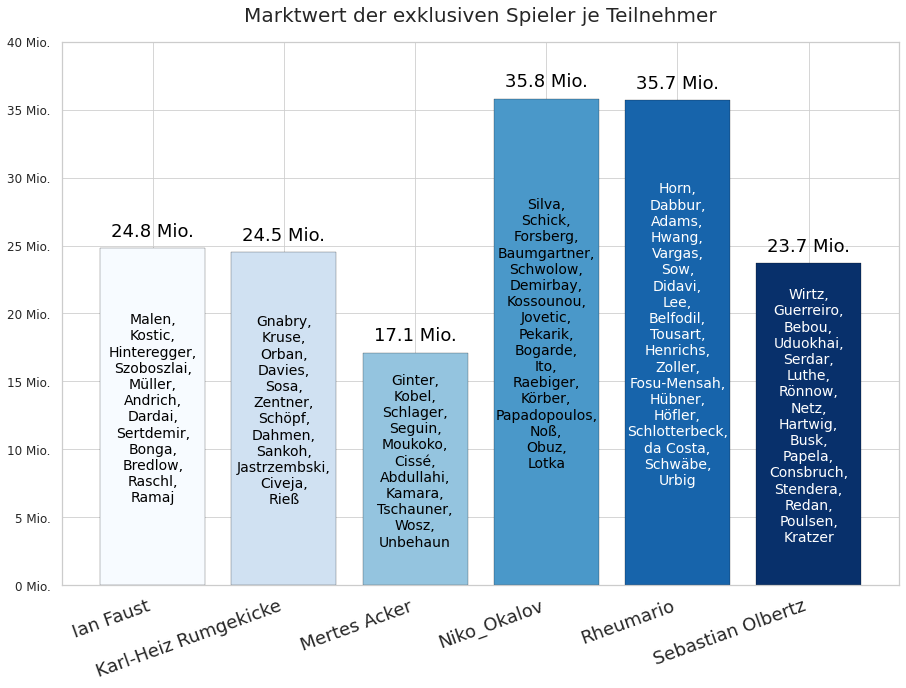

In [29]:
# Visualize the value of the exclusive players as a bar chart
fig, ax = plt.subplots(figsize=(15,10))

# Pick 6 colors form a colormap 
cmap=plt.cm.get_cmap('Blues', 6)
colors = [cmap(i) for i in range(6)]

bar = ax.bar(x=teilnehmer_liste, 
             height=exclusive_mv_list, 
             label=label_list, 
             color=colors,
             edgecolor='black')

plt.xticks(fontsize=18, 
           rotation=20, 
           horizontalalignment="right")

# Y ticks in more football, less scientific manner
y_loc, _ = plt.yticks()
plt.yticks(ticks=y_loc, 
           labels=["0 Mio.",
                   "5 Mio.",
                   "10 Mio.",
                   "15 Mio.",
                   "20 Mio.",
                   "25 Mio.",
                   "30 Mio.",
                   "35 Mio.",
                   "40 Mio."], 
           fontsize=12)

# The labels on the bar are tricky. First show the sum of market value on top of the bar
ax.bar_label(bar, 
             labels=['%.1f Mio.' % e for e in exclusive_mv_list],
             padding=8, 
             color='black', 
             fontsize=18)

# The labels on the bars need to be in different font colors. 
# Create two label lists with empty entries to skip the bars, where it should not be shown.
# After bar 4 the readibility changes from black to white
label_list_black = label_list[:4]
label_list_black.extend(('',''))

label_list_white = ['']*4
label_list_white.extend(label_list[4:])

# First show the black labels, then add the white labels
ax.bar_label(bar, 
             labels=[names_list for names_list in label_list_black],
             padding=8, 
             color='black',
             fontsize=14, 
             label_type='center')
ax.bar_label(bar, 
             labels=[names_list for names_list in label_list_white],
             padding=8, 
             color='white', 
             fontsize=14, 
             label_type='center')

plt.title("Marktwert der exklusiven Spieler je Teilnehmer", size=20, pad=20)

plt.show()